In [1]:
import h5py
import matplotlib.pyplot as plt
import glob
import corner as corner
import os
import variable_qmin
from bilby.core.prior import (
    Prior, PriorDict, ConditionalPriorDict,
    Uniform, ConditionalUniform, Constraint, 
)
import corner as corner
import numpy as np

/opt/conda/igwn-py310-20240410/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
result=h5py.File('../variable_qmin_inference/O4a_parabolam2min_prod_condgammazeta/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')

In [5]:
important_result = [result['posterior']['alpha'], result['posterior']['beta'], result['posterior']['gamma'],\
                    result['posterior']['mmin'], result['posterior']['mmax'], result['posterior']['zeta']]

In [18]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="teal",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=['alpha','beta','gamma', 'mmin', 'mmax', 'zeta'],
)
prior_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="grey",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=['alpha','beta','gamma', 'mmin', 'mmax', 'zeta'],
    zorder=-9,
)
prior=ConditionalPriorDict(filename='../variable_qmin_inference/O4a-variablem2min-cond.prior')

In [15]:
prior_dict = prior.sample(100000)

In [16]:
prior_samps = [prior_dict['alpha'], prior_dict['beta'], prior_dict['gamma'],\
                    prior_dict['mmin'], prior_dict['mmax'], prior_dict['zeta']]

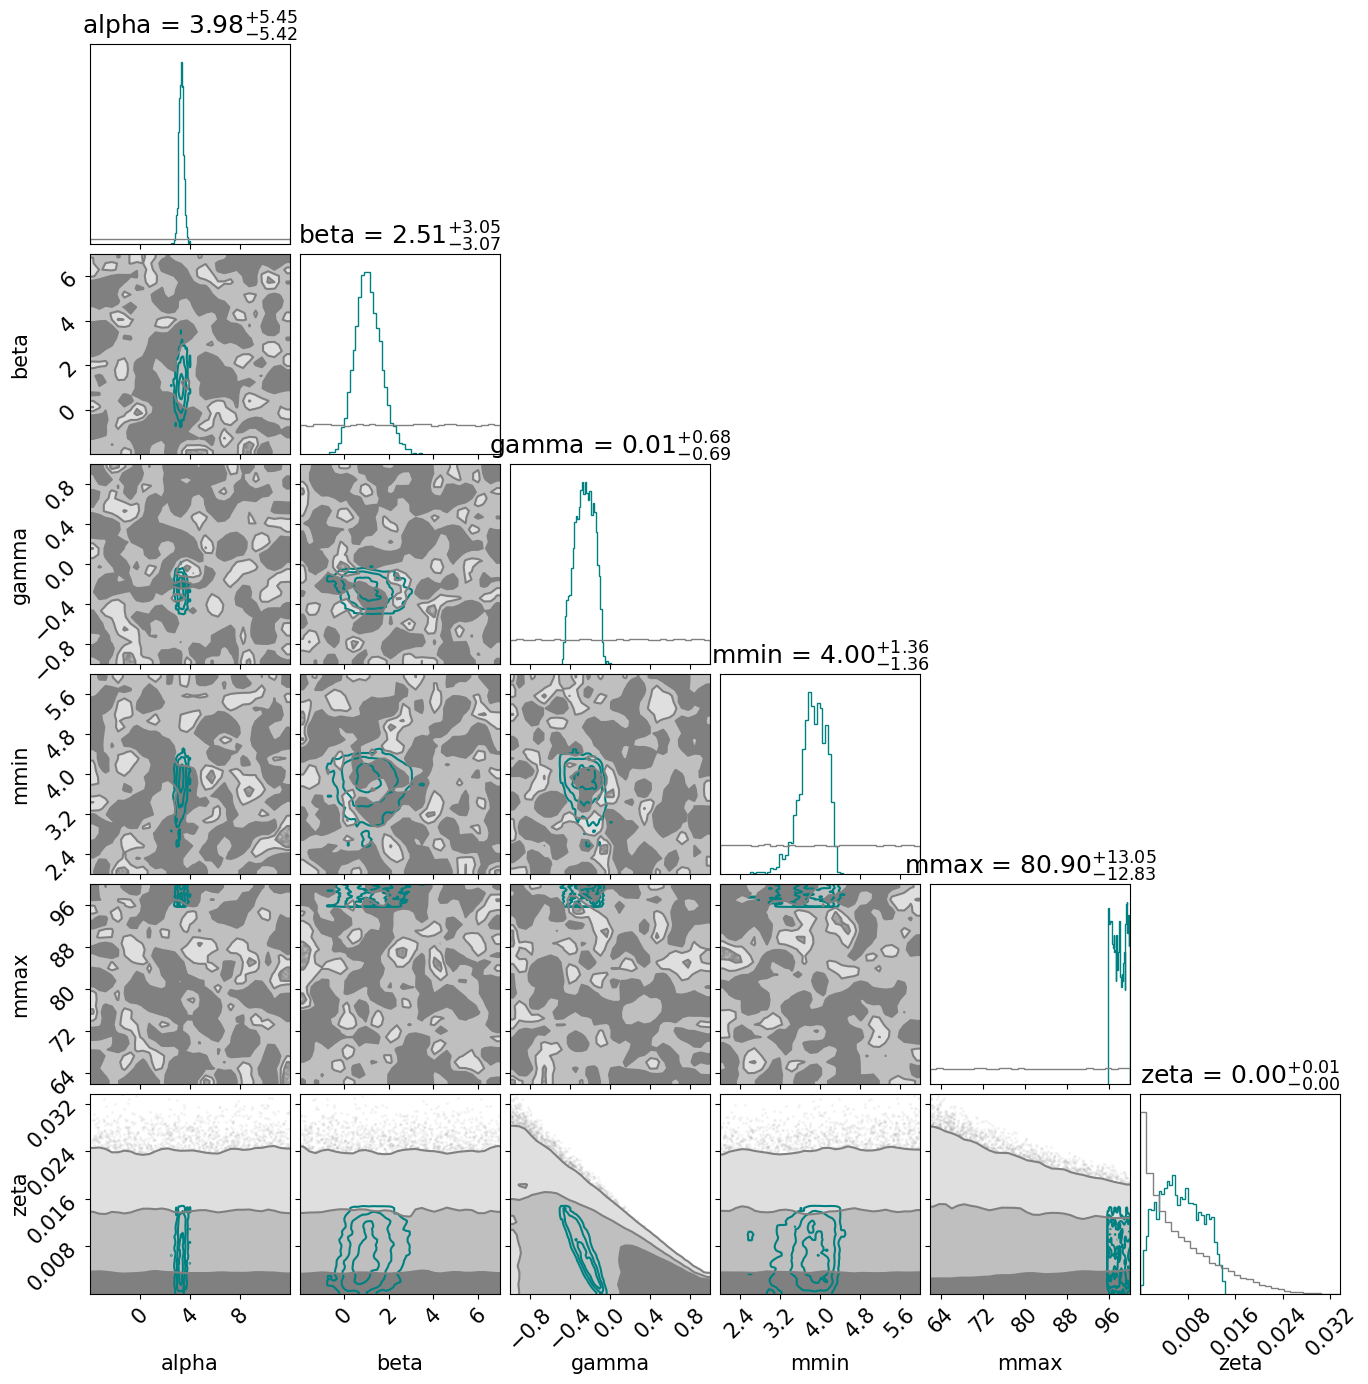

In [20]:
plt.rcParams.update({'font.size': 15})
fig = corner.corner(np.swapaxes(important_result, 0,1), **corner_kwargs)
corner.corner(np.swapaxes(prior_samps, 0,1), fig=fig, **prior_kwargs)
plt.savefig('../variable_qmin_inference//O4a_parabolam2min_prod_condgammazeta/result/resultscorner_parabolacond_prior.pdf')